In [1]:
#importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('https://media.githubusercontent.com/media/Avangarde2225/fashion_image_category_classification_with_deep_learning/main/dataset/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('https://media.githubusercontent.com/media/Avangarde2225/fashion_image_category_classification_with_deep_learning/main/dataset/fashion-mnist_test.csv', sep = ',')

In [3]:
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [7]:
training.shape

(60000, 785)

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

3.0

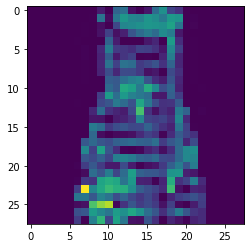

In [10]:
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

# plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

label = training[i,0]
label
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [11]:
#to bring the category
label = training[i,0]
label

3.0

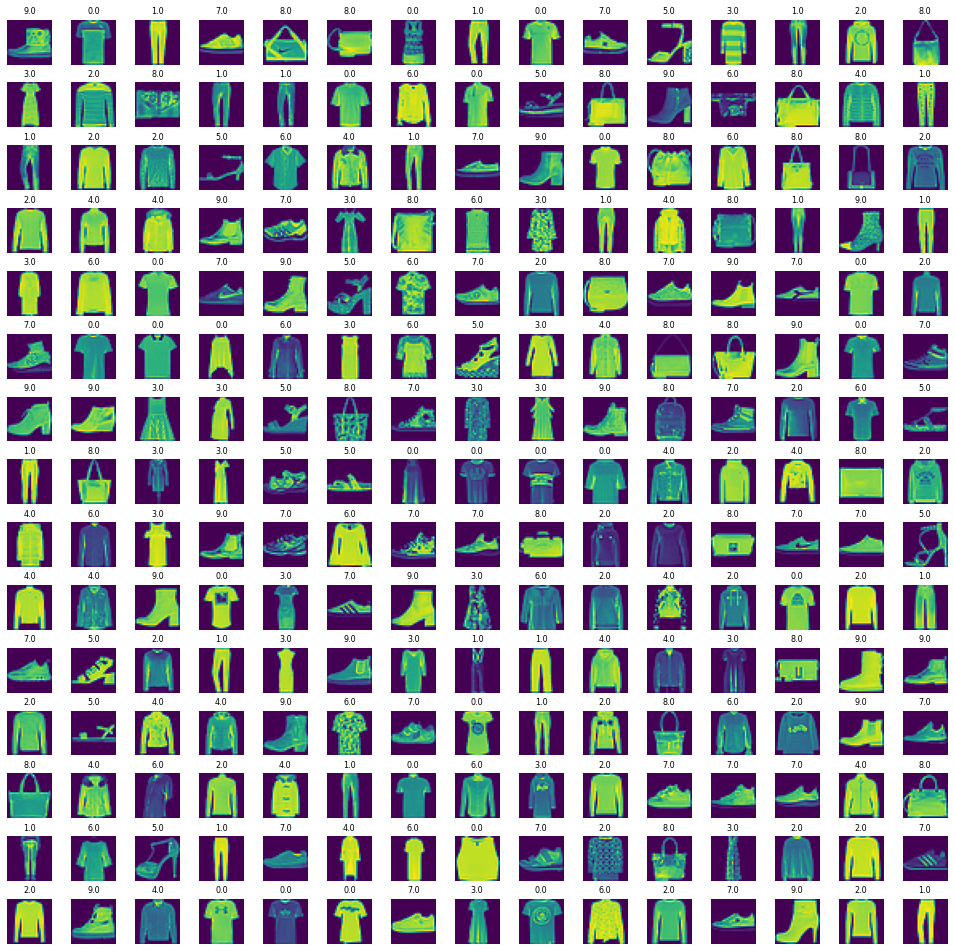

In [12]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## Model Training

In [13]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [15]:
X_train.shape

(48000, 784)

In [16]:
y_train.shape

(48000,)

In [17]:
y_validate.shape

(12000,)

In [18]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

Convolutions use a kernel matrix to scan a given image and apply a filter to obtain a certain effect.
An image kernel is a matrix used to apply effects such as blurring and sharpening.

Pooling and down sampling layers are placed afer convolutional layers to reduce feature map dimensionality. This improves the computational efficiency while preserving features. Pooling helps the model to generalize by avoiding overfitting. If one of the pixels is shifted, the pooled feature map will still be the same. 

In [22]:
!pip install keras

In [23]:
!pip install tensorflow

In [24]:
import keras

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

In [25]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()


cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3,input_shape = (28,28,1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense( 32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [27]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\serda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 28ms/step - loss: 1.2329 - accuracy: 0.5910 - val_loss: 0.7188 - val_accuracy: 0.7467
Epoch 2/50
94/94 [==============================] - 2s 26ms/step - loss: 0.6705 - accuracy: 0.7568 - val_loss: 0.5912 - val_accuracy: 0.7897
Epoch 3/50
94/94 [==============================] - 2s 26ms/step - loss: 0.5868 - accuracy: 0.7886 - val_loss: 0.5345 - val_accuracy: 0.8071
Epoch 4/50
94/94 [==============================] - 2s 26ms/step - loss: 0.5456 - accuracy: 0.8015 - val_loss: 0.5045 - val_accuracy: 0.8202
Epoch 5/50
94/94 [==============================] - 3s 27ms/step - loss: 0.5159 - accuracy: 0.8119 - val_loss: 0.4822 - val_accuracy: 0.8283
Epoch 6/50
94/94 [==============================] - 3s 27ms/step - loss: 0.5001 - accuracy: 0.8174 - val_loss: 0.4656 - val_accuracy: 0.8348
Epoch 7/50
94/94 [==============================] - 3s 27ms/step - loss: 0.4847 - accuracy: 0.8243 - val_loss: 0.4534 - val_accuracy: 0.8390
Epoch 8/50
94

## Evaluating the Model

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8751
Test Accuracy : 0.875


In [30]:
# get the predictions for the test data
predicted_classes = (cnn_model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [31]:
predicted_classes

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [32]:
y_test=y_test.astype("int32")

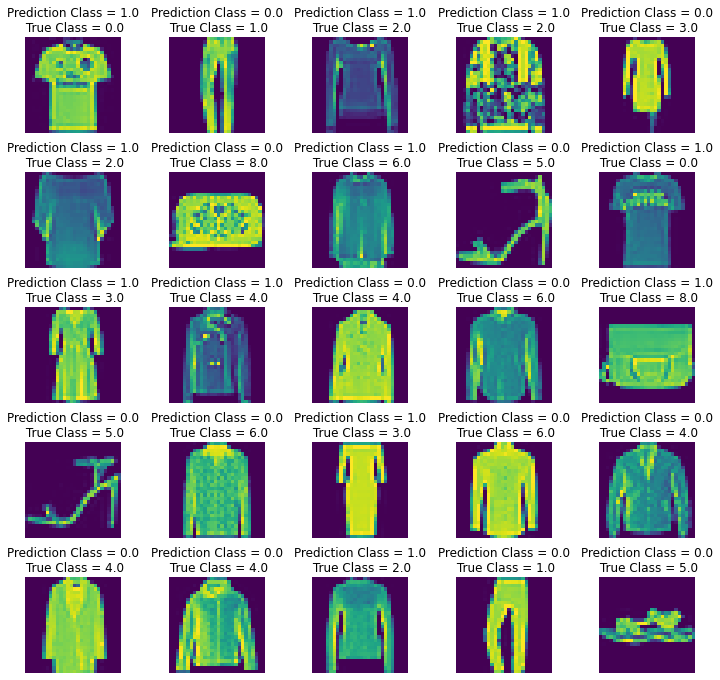

In [33]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i][0], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [35]:
predicted_classes.shape

(10000, 10)

In [39]:
y_test.shape

(10000,)

In [47]:
y_train.shape

(48000,)

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))